## 1. Importing the dependencies

In [123]:
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns # For statistical data visualization
from sklearn.preprocessing import LabelEncoder # For encoding categorical features into numerical labels
from imblearn.over_sampling import SMOTE # For oversampling imbalanced datasets
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV # For splitting data, cross-validation, and hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier # For building Decision Tree models
from sklearn.ensemble import RandomForestClassifier # For building Random Forest models
from xgboost import XGBClassifier # For building XGBoost models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # For evaluating model performance
import pickle # For serializing and deserializing Python objects

## 2. Data loading and understanding the data

In [58]:
# Read the csv data to a pandas dataframe
df = pd.read_csv('/content/train.csv')

Initial inspection of df

In [59]:
df.shape

(800, 22)

In [60]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [61]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [62]:
# Display all the columns of a df
pd.set_option('display.max_columns', None)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [64]:
# Convert age column to integer
df['age'] = df['age'].astype(int)

In [65]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [66]:
# Get unique values
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(f'{col}: {df[col].unique()}')
    print("-"*50)

A1_Score: [1 0]
--------------------------------------------------
A2_Score: [0 1]
--------------------------------------------------
A3_Score: [1 0]
--------------------------------------------------
A4_Score: [0 1]
--------------------------------------------------
A5_Score: [1 0]
--------------------------------------------------
A6_Score: [0 1]
--------------------------------------------------
A7_Score: [1 0]
--------------------------------------------------
A8_Score: [0 1]
--------------------------------------------------
A9_Score: [1 0]
--------------------------------------------------
A10_Score: [1 0]
--------------------------------------------------
gender: ['f' 'm']
--------------------------------------------------
ethnicity: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice: ['no' 'yes']
--------------------------------------------

In [67]:
# Drop ID and age_desc columm because they dont contribute to the model
df = df.drop(['ID','age_desc'], axis=1)

In [68]:
df.shape

(800, 20)

In [69]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [70]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [71]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [72]:
# Define the mapping dictionary for country names
country_mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# Replace values in the country column
df['contry_of_res'] = df['contry_of_res'].replace(country_mapping)

In [73]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [74]:
# Target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


Insights:
1. Missing values in ethnicity & relation columns,
2. age_dec_ column has only one unique value so it was removed,
3. Fixed country name,
4. Identified class imbalance in the target column.


## 3. Explore the data and analysis (EDA)

In [75]:
df.shape

(800, 20)

In [76]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [77]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [78]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate analysis**

Numerical columns:
- age
- results

In [79]:
# Set the desired theme for my ploth using seaborn
sns.set_theme(style="whitegrid")

**Distribution plots**

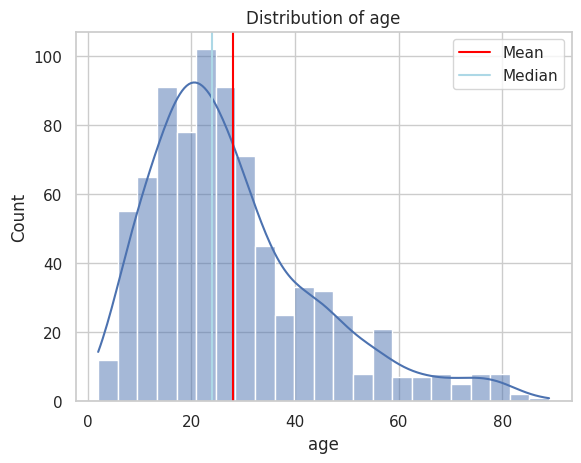

In [80]:
# Histogram for "age"
sns.histplot(df['age'], kde=True)
plt.title('Distribution of age')

# Calculate mean and median
mean_age = df['age'].mean()
median_age = df['age'].median()

# Add mean and median to the plot
plt.axvline(mean_age, color='red', linestyle='-', label='Mean')
plt.axvline(median_age, color='lightblue', linestyle='-', label='Median')
plt.legend()
plt.show()

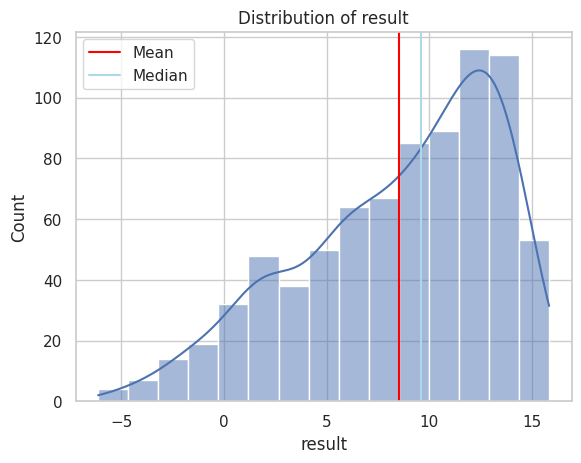

In [81]:
# Histogram for "result"
sns.histplot(df['result'], kde=True)
plt.title('Distribution of result')

# Calculate mean and median
mean_result = df['result'].mean()
median_result = df['result'].median()

# Add mean and median to the plot
plt.axvline(mean_result, color='red', linestyle='-', label='Mean')
plt.axvline(median_result, color='lightblue', linestyle='-', label='Median')
plt.legend()
plt.show()

**Box plots for identifyung outliers in the numerical columns**

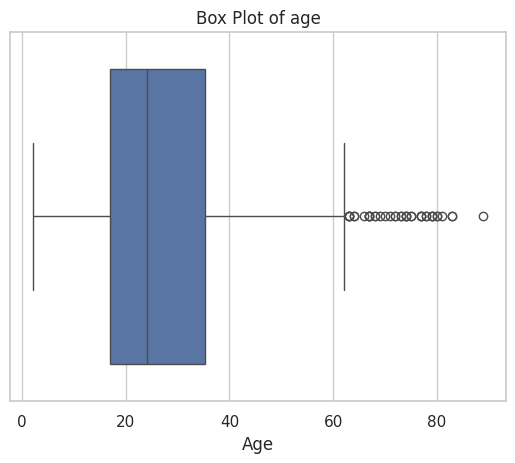

In [82]:
# Box plots
sns.boxplot(x=df['age'])
plt.title('Box Plot of age')
plt.xlabel('Age')
plt.show()

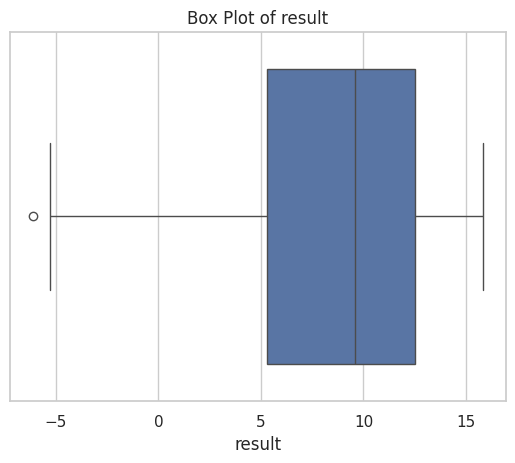

In [83]:
# Box plots
sns.boxplot(x=df['result'])
plt.title('Box Plot of result')
plt.xlabel('result')
plt.show()

In [84]:
# Count outliers using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [85]:
len(outliers_age)

39

In [86]:
# Count outliers using IQR method
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_result = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [87]:
len(outliers_result)

1

**Univeriate analysis of Categorical features**

In [88]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

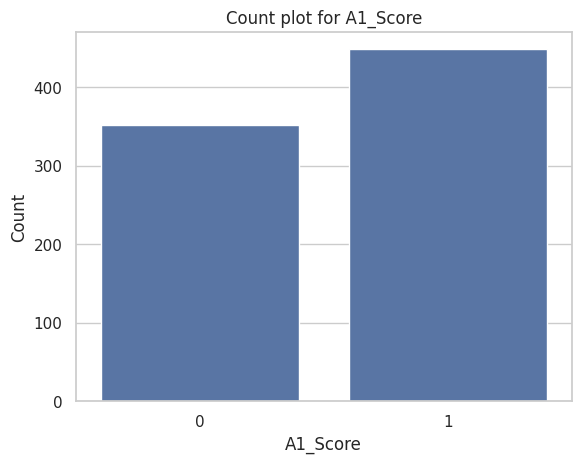

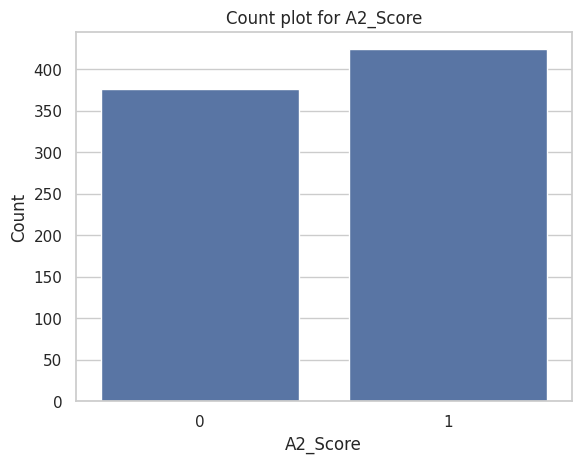

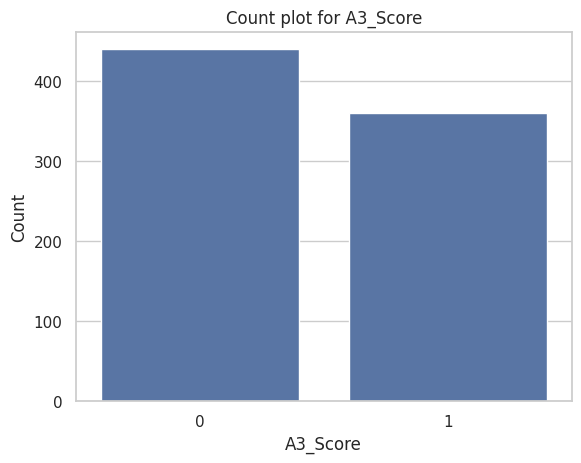

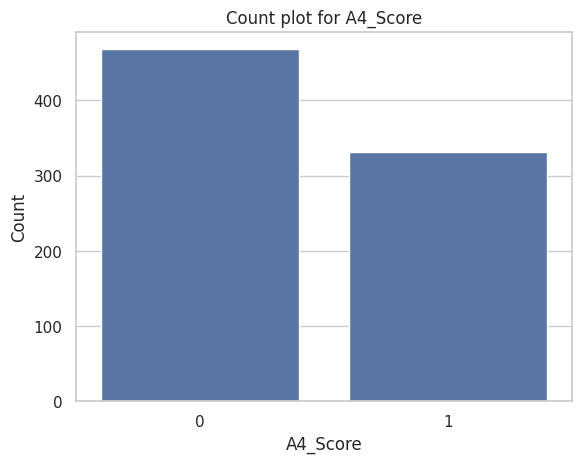

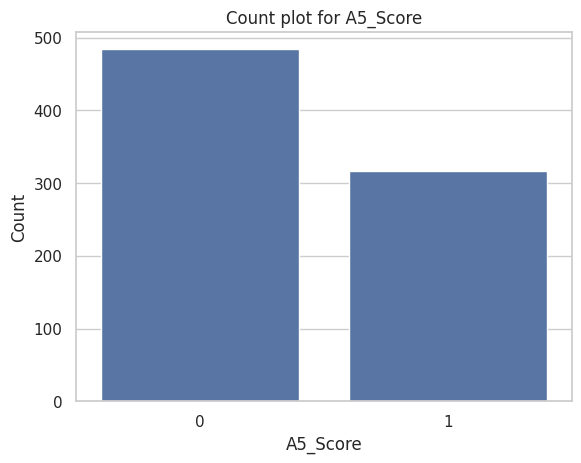

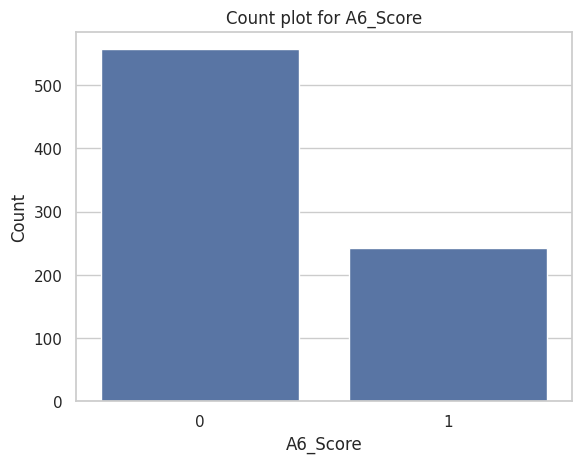

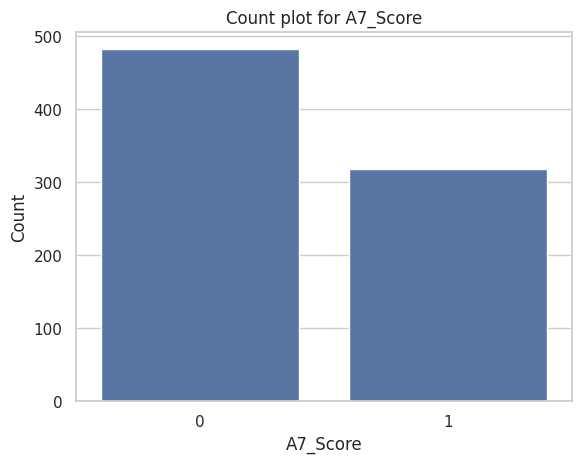

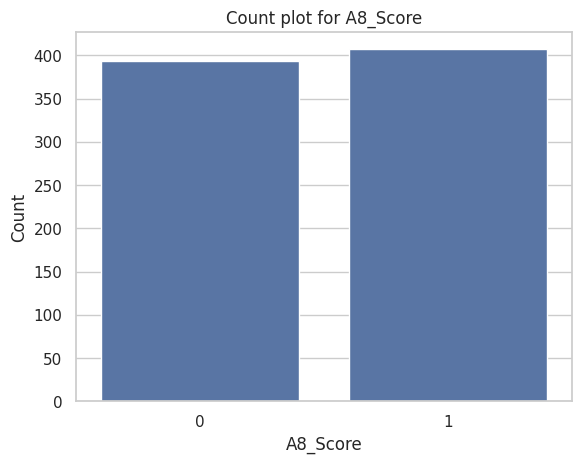

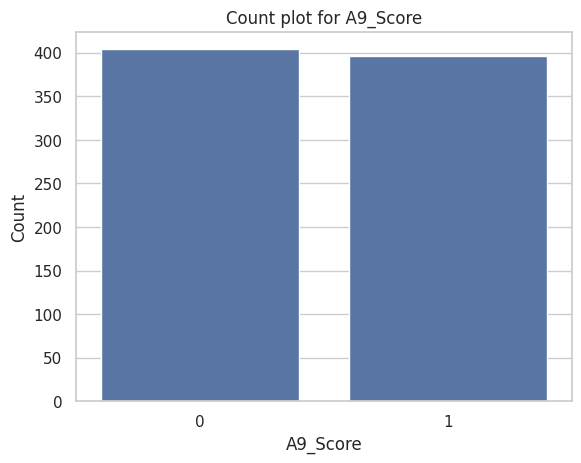

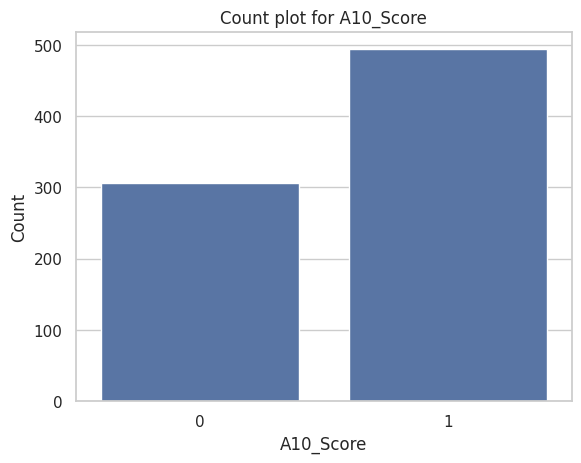

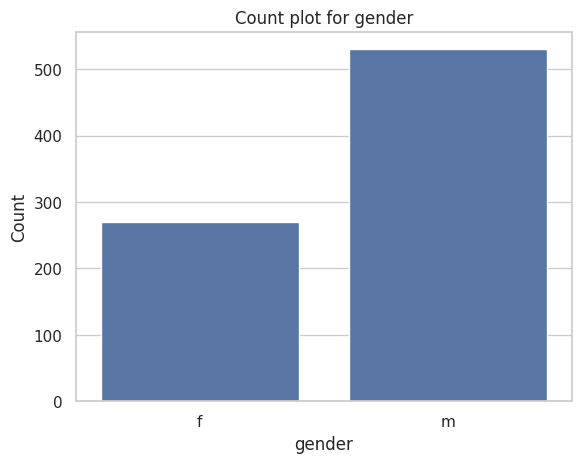

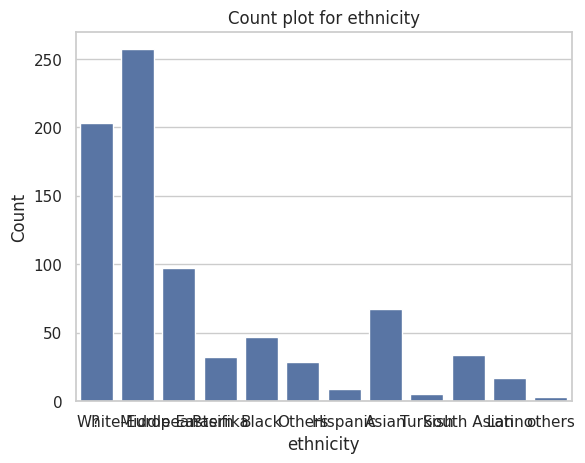

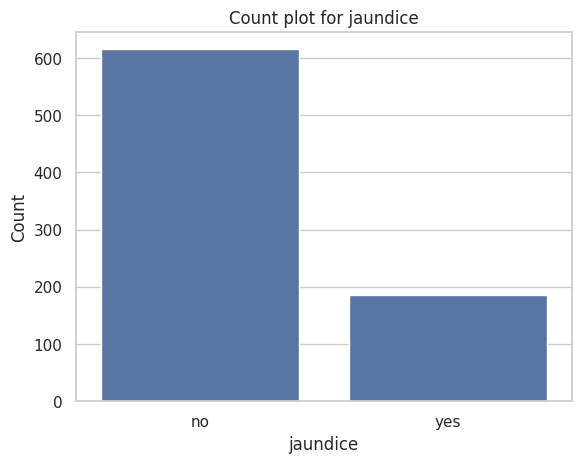

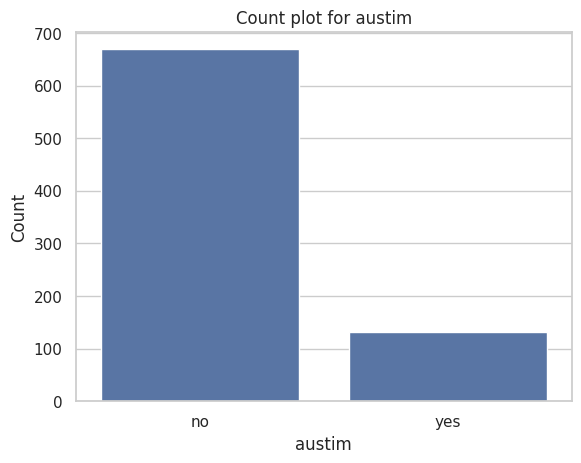

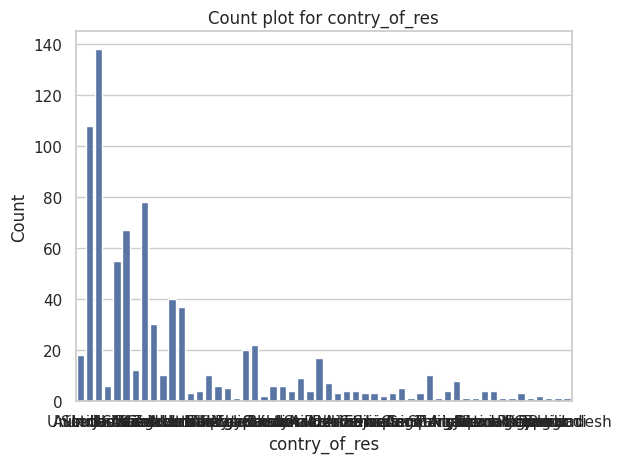

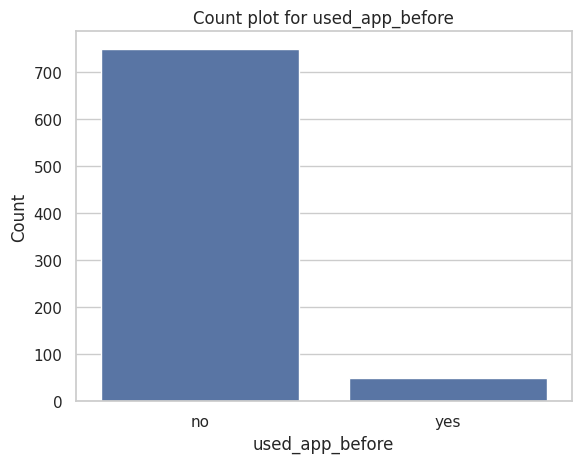

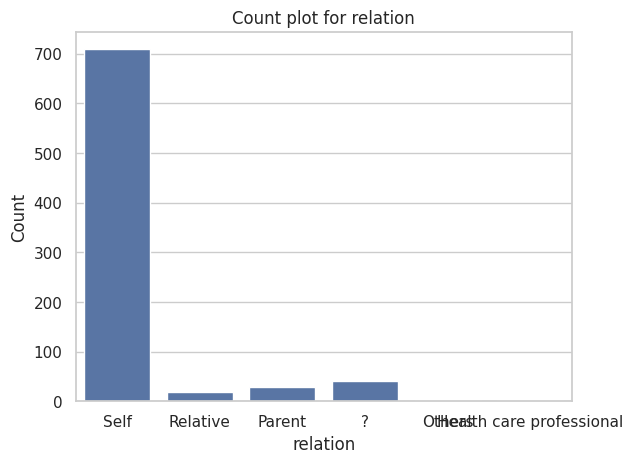

In [89]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before','relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

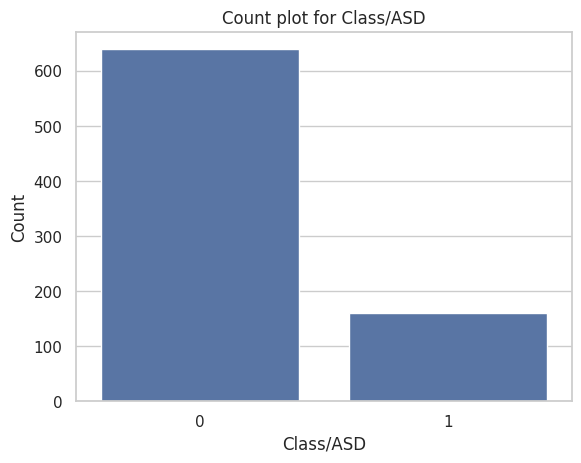

In [90]:
# Count plot for target column
sns.countplot(x=df['Class/ASD'])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

**Handle missing values in ethniticity and relation column**



In [91]:
# Handle missing values in ethniticity and relation column
df['ethnicity'] = df['ethnicity'].replace({'?' : 'Others', 'others': 'Others'})
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [92]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [93]:
df['relation'] = df['relation'].replace(
    {
        "?": "Others",
        "Relative": "Others",
        "Parent": "Others",
        "Relative": "Others",
        "Health care professional": "Others",
        "Unknown": "Others"
    }
)
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [94]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label encoding**

In [95]:
# Identify columns with "object" data type
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [96]:
# Initialize dictionary to store the enconders
encoders = {}

# Apply label encoding and store the endcoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder # Saving the enconder for this column

# Save the encoders as a pickle file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [97]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [98]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**Bivariate analysis**

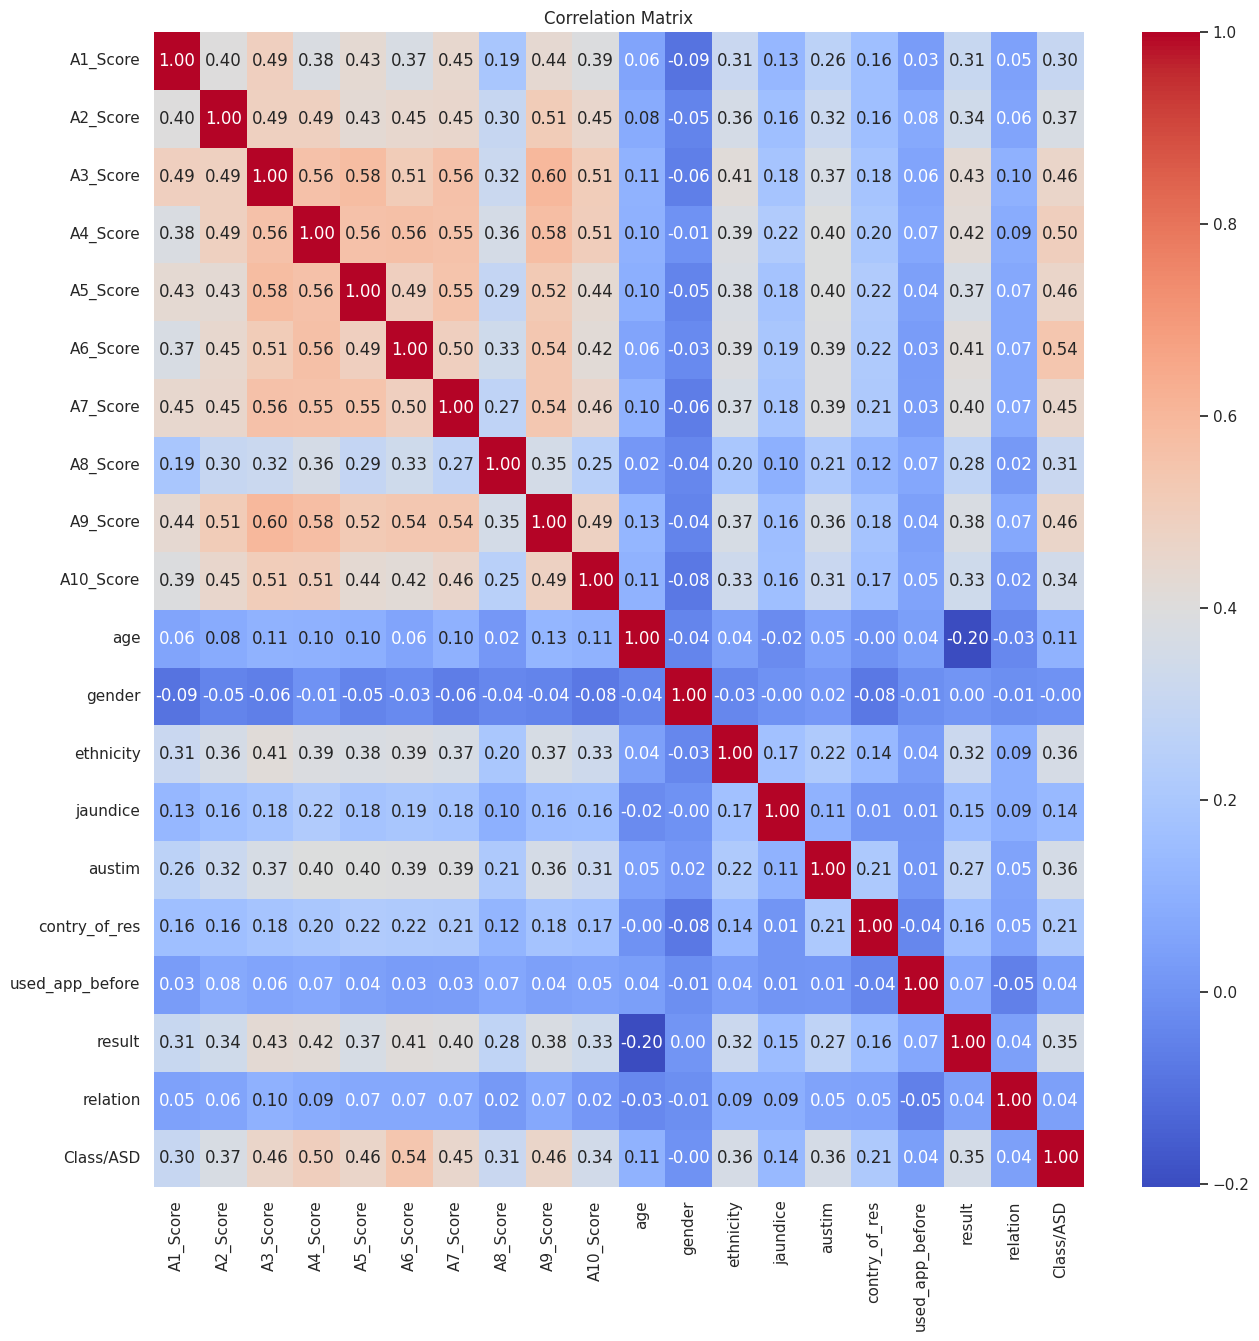

In [99]:
# Correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insights from EDA**
- There are few outliers in the numerical columns (age, result),
- There's a class imbalance in the target column,
- There's a class imbalance in the categoirical features,
- We don't have any highly correlated column,
- Performed label encoding and saved the encoders.

## 4. Data preprocessing

**Handle the outliers**

In [100]:
# Function for replacing the outliers with medium value
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    # Replace outliers with median value
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

In [101]:
# Replace outliers in the "age" column
df = replace_outliers_with_median(df, 'age')

# Replace outliers in the "result" column
df = replace_outliers_with_median(df, 'result')

In [102]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


**Train Test Split**

In [103]:
# Separate features (X) and target (y)
X = df.drop('Class/ASD', axis=1) # features
y = df['Class/ASD'] # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of y_train: (640,)
Shape of y_test: (160,)


In [105]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [106]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE (Synthetic Minority Oversampling Technique)**

 It's a widely used algorithm to address class imbalance in datasets, particularly when the minority class has significantly fewer observations than the majority class. In this notebook, it was applied to the Class/ASD target variable.

In [107]:
smote = SMOTE(random_state=42)

In [108]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [109]:
print(y_train_smote.shape)

(1030,)


In [110]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


## 5. Model training:

1. Decision Tree Classifier: This model works by creating a tree-like structure where each internal node represents a 'test' on an attribute (e.g., 'age > 30?'), each branch represents the outcome of the test, and each leaf node represents a class label (the decision taken after computing all attributes).
* Pros: Simple to understand and interpret, handles both numerical and categorical data, requires little data preparation.
* Cons: Prone to overfitting, can be unstable (small changes in data can lead to a very different tree).

2. Random Forest Classifier: This is an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It's essentially a collection of decision trees.
* Pros: Reduces overfitting compared to a single decision tree, handles high dimensionality, very robust.
* Cons: Less interpretable than a single decision tree, can be computationally intensive and require more resources.

3. XGBoost Classifier (Extreme Gradient Boosting): This is another ensemble learning method, but it uses gradient boosting. It builds trees sequentially, where each new tree tries to correct the errors made by the previous ones. It's highly efficient and often provides state-of-the-art performance.
* Pros: High performance, speed, handles various data types, built-in regularization to prevent overfitting.
* Cons: Can be complex to tune, might be prone to overfitting if parameters are not carefully chosen.

In [111]:
# Dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [112]:
# Dictionary to store the cross validation results
cv_scores = {}

# Perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters.")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters.
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters.
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters.
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [113]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

## 6. Model selection and hyperparameter tuning

* Model Selection is about choosing the best performing model from the different algorithms you've tried (in this case, Decision Tree, Random Forest and XGBoost). After training multiple models, we compare their performance metrics (like accuracy from your cross-validation scores) to decide which one is most promising for your specific problem.

* Hyperparameter Tuning involves optimizing the settings of the chosen model. Unlike model parameters which are learned during training, hyperparameters are set before training (example the number of trees in a Random Forest or the maximum depth of a Decision Tree). Tuning means systematically experimenting with different combinations of these settings to find the ones that yield the best performance on unseen data, preventing both underfitting and overfitting. The goal is to maximize the model's effectiveness.

In [114]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [122]:
# Hyperparameter grids for RandomizedSearchCV
param_grid_dt= {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Hyperparameter tuning for 3 based models with a for loop

# Dictionary to store the best estimator (model) for each algorithm after tuning
best_tuned_models = {}

# Dictionary to store the best score achieved by each algorithm after tuning
best_tuned_scores = {}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Select the appropriate parameter grid
    if model_name == "Decision Tree":
        param_grid = param_grid_dt
    elif model_name == "Random Forest":
        param_grid = param_grid_rf
    elif model_name == "XGBoost":
        param_grid = param_grid_xgb
    else:
        print(f"No parameter grid defined for {model_name}. Skipping.")
        continue

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=50,  # Number of parameter settings that are sampled
        cv=5,       # 5-fold cross-validation
        scoring='accuracy',
        random_state=42,
        n_jobs=-1   # Use all available cores
    )

    # Fit RandomizedSearchCV to the SMOTE-resampled training data
    random_search.fit(X_train_smote, y_train_smote)

    # Store the best model from this specific algorithm and its score
    best_tuned_models[model_name] = random_search.best_estimator_
    best_tuned_scores[model_name] = random_search.best_score_

    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {random_search.best_score_:.2f}")
    print("-"*50)

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Best cross-validation accuracy for Decision Tree: 0.87
--------------------------------------------------
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Best cross-validation accuracy for Random Forest: 0.93
--------------------------------------------------
Tuning hyperparameters for XGBoost...
Best parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.5}
Best cross-validation accuracy for XGBoost: 0.91
--------------------------------------------------


Summary of the best parameters found and their corresponding cross-validation accuracies:

* Decision Tree: Best parameters were {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'} with a best cross-validation accuracy of 0.87.
* Random Forest: Best parameters were {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False} with a best cross-validation accuracy of 0.93.
* XGBoost: Best parameters were {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.5} with a best cross-validation accuracy of 0.91.

From these results the **Random Forest Classifier** achieved the highest cross-validation accuracy after tuning, making it the most promising model among the three for this dataset.

In [124]:
import pickle

# Find the model with the highest cross-validation score
overall_best_model_name = max(best_tuned_scores, key=best_tuned_scores.get)
overall_best_score = best_tuned_scores[overall_best_model_name]
overall_best_model = best_tuned_models[overall_best_model_name]

# Save only the overall best model
file_name = f'{overall_best_model_name.replace(" ", "_")}_overall_best_model.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(overall_best_model, file)

print(f"Successfully saved the overall best model: {overall_best_model_name} with accuracy {overall_best_score:.2f} to {file_name}")

Successfully saved the overall best model: Random Forest with accuracy 0.93 to Random_Forest_overall_best_model.pkl


## 7. Evaluation

In [127]:
# Evaluate on test data
y_pred = overall_best_model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.825
Confusion Matrix:
 [[109  15]
 [ 13  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       124
           1       0.61      0.64      0.62        36

    accuracy                           0.82       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.83      0.82      0.83       160

